In [20]:
%matplotlib inline 
import pandas as pd 
import seaborn as sns

datos = pd.read_csv("nhanes_2015_2016.csv")
datos.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [2]:
# Distribución de frecuencias, indica el numero de registros (filas) en nuestro
# dataframe

datos = datos.rename(columns=({"DMDEDUC2":"NIVEL_EDUCATIVO","BMXWT":"PESO_CORPORAL",
                              "BPXSY1":"P_ARTERIAL_SIST_1","BPXSY2":"P_ARTERIAL_SIST_2",
                               "BPXDI1":"P_ARTERIAL_DIAS_1","BPXSY2":"P_ARTERIAL_DIAS_2",
                               "RIDAGEYR":"EDAD"
                              
                              }))
datos.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,EDAD,RIDRETH1,DMDCITZN,NIVEL_EDUCATIVO,...,P_ARTERIAL_DIAS_2,BPXDI2,PESO_CORPORAL,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [5]:
datos["EDUCACION"] = datos.NIVEL_EDUCATIVO.replace({
    1:"Noveno Grado",
    2:"Noveno a Undecimo Grado",
    3:"Bachiller",
    4:"Universidad",
    5:"No Indica",
    9:"Desconocido"  
    
}) 
datos.value_counts().sort_values(ascending=False)

SEQN   ALQ101  ALQ110  ALQ130  SMQ020  RIAGENDR  EDAD  RIDRETH1  DMDCITZN  NIVEL_EDUCATIVO  DMDMARTL  DMDHHSIZ  WTINT2YR   SDMVPSU  SDMVSTRA  INDFMPIR  P_ARTERIAL_SIST_1  P_ARTERIAL_DIAS_1  P_ARTERIAL_DIAS_2  BPXDI2  PESO_CORPORAL  BMXHT  BMXBMI  BMXLEG  BMXARML  BMXARMC  BMXWAIST  HIQ210  SEXO    EDUCACION  
83735  2.0     1.0     1.0     2       2         56    3         1.0       5.0              6.0       1         102718.00  1        131       5.00      132.0              72.0               134.0              68.0    109.8          160.9  42.4    38.5    37.7     38.3     110.1     2.0     Hombre  No Indica      1
86013  2.0     1.0     1.0     1       2         64    2         2.0       5.0              3.0       3         7791.99    1        124       3.48      122.0              74.0               126.0              78.0    76.4           168.6  26.9    38.1    37.2     32.2     96.2      2.0     Hombre  No Indica      1
84295  2.0     1.0     1.0     1       2         58    5 

In [89]:
a = datos
datos["NIVEL_EDUCATIVO"] = datos.NIVEL_EDUCATIVO.replace({
    1:"Noveno Grado",
    2:"Noveno a Undecimo Grado",
    3:"Bachiller",
    4:"Universidad",
    5:"No Indica",
    9:"Desconocido"  
    
}) 

pd.isnull(a.NIVEL_EDUCATIVO).sum() # datos vacios tipo NaN

261

In [66]:
contador = 0
for i in range(len(a.NIVEL_EDUCATIVO)):
    
    if pd.isnull(a.NIVEL_EDUCATIVO[i]) ==  True:
        print(a.NIVEL_EDUCATIVO.index[i])
        contador += 1
        
print("datos vacios tipos nan son ",contador)        
        
    

8
16
54
59
67
86
104
171
172
230
274
278
316
371
375
383
393
404
413
420
425
455
464
487
541
555
568
575
625
630
632
683
726
741
752
835
864
886
902
912
965
968
970
1024
1041
1065
1077
1091
1096
1103
1117
1193
1195
1213
1230
1243
1271
1325
1387
1388
1427
1447
1509
1511
1522
1535
1578
1620
1634
1655
1658
1660
1718
1739
1794
1800
1801
1802
1809
1819
1830
1923
1960
1962
1979
2009
2019
2021
2040
2071
2081
2187
2193
2210
2221
2239
2260
2279
2304
2317
2338
2339
2345
2379
2404
2408
2502
2518
2521
2524
2574
2578
2618
2626
2635
2713
2748
2770
2805
2826
2855
2874
2880
2915
2927
2937
2944
2950
2976
2978
2983
2987
3000
3019
3046
3089
3102
3150
3184
3188
3193
3221
3227
3234
3242
3262
3374
3417
3446
3472
3487
3489
3516
3597
3607
3620
3625
3637
3699
3783
3786
3787
3789
3809
3817
3827
3831
3848
3877
3888
3912
3945
3950
3971
3983
3996
4011
4014
4075
4077
4080
4122
4146
4150
4196
4197
4198
4204
4215
4247
4331
4341
4348
4349
4351
4371
4407
4417
4435
4491
4524
4529
4550
4552
4590
4596
4621
4623
4628
4643


In [47]:
a.NIVEL_EDUCATIVO.value_counts()

4.0    1621
5.0    1366
3.0    1186
1.0     655
2.0     643
9.0       3
Name: NIVEL_EDUCATIVO, dtype: int64

In [64]:
pd.isnull(a.NIVEL_EDUCATIVO)

0       False
1       False
2       False
3       False
4       False
        ...  
5730    False
5731    False
5732    False
5733    False
5734    False
Name: NIVEL_EDUCATIVO, Length: 5735, dtype: bool

In [3]:
# creando columnas nuevas

datos["SEXO"] = datos.RIAGENDR.replace({1:"Mujer",2:"Hombre"})

datos

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,EDAD,RIDRETH1,DMDCITZN,NIVEL_EDUCATIVO,...,BPXDI2,PESO_CORPORAL,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,SEXO
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0,Mujer
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN,Mujer
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0,Mujer
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0,Hombre
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0,Hombre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695,2.0,2.0,NaN,1,2,76,3,1.0,3.0,...,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0,Hombre
5731,93696,2.0,2.0,NaN,2,1,26,3,1.0,5.0,...,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0,Mujer
5732,93697,1.0,NaN,1.0,1,2,80,3,1.0,4.0,...,58.0,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0,Hombre
5733,93700,NaN,NaN,NaN,1,1,35,3,2.0,1.0,...,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0,Mujer


In [72]:
# porcentajes - tabla de frecuencias

datos.NIVEL_EDUCATIVO.value_counts(normalize=True)*100

Universidad                29.612715
No Indica                  24.954330
Bachiller                  21.666058
Noveno Grado               11.965656
Noveno a Undecimo Grado    11.746438
No Desconocido              0.054805
Name: NIVEL_EDUCATIVO, dtype: float64

In [73]:
datos.SEXO.value_counts(normalize=True)*100

Hombre    51.891892
Mujer     48.108108
Name: SEXO, dtype: float64

In [75]:
datos.SEXO.count()

5735

In [79]:
datos.NIVEL_EDUCATIVO.dropna().count()
datos.NIVEL_EDUCATIVO.dropna().describe()

count            5474
unique              6
top       Universidad
freq             1621
Name: NIVEL_EDUCATIVO, dtype: object

In [81]:
datos.PESO_CORPORAL.dropna().describe()

count    5666.000000
mean       81.342676
std        21.764409
min        32.400000
25%        65.900000
50%        78.200000
75%        92.700000
max       198.900000
Name: PESO_CORPORAL, dtype: float64

A continuación, calculamos la proporción de sujetos de NHANES que son prehipertensos en función de la presión arterial diastólica.

In [119]:
import numpy as np

a =((datos.BPXDI1 >=80) & (datos.BPXDI2 <=89))
a.mean()

0.14803836094158676

In [117]:
b = ((datos.BPXDI1 >= 80) & (datos.BPXDI2 <= 89))
b.mean()

0.14803836094158676

In [121]:
np.mean((datos.BPXDI1 >= 80) & (datos.BPXDI2 <= 89))

0.14803836094158676

In [125]:
prueba_promedio = [datos["BPXDI1"],datos["BPXDI2"]]
np.mean((prueba_promedio[0] >= 80)&(prueba_promedio[1]<=89))

0.14803836094158676

In [126]:
np.mean((datos.SEXO=="Mujer") &(BPXDI1))

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [128]:
datos.SEXO

0        Mujer
1        Mujer
2        Mujer
3       Hombre
4       Hombre
         ...  
5730    Hombre
5731     Mujer
5732    Hombre
5733     Mujer
5734    Hombre
Name: SEXO, Length: 5735, dtype: object

/home/oscar/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


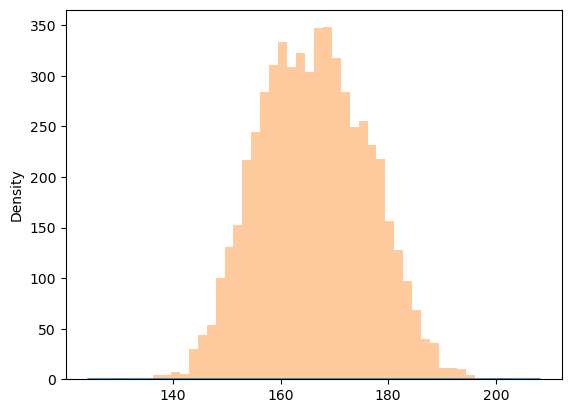

In [9]:
a = sns.distplot(x=datos.BMXHT.dropna()) # Estamos gráficando datos sin los datos NAN
b = sns.distplot(x=datos.BMXHT, kde= False)



Text(0.5, 1.0, 'Hola')

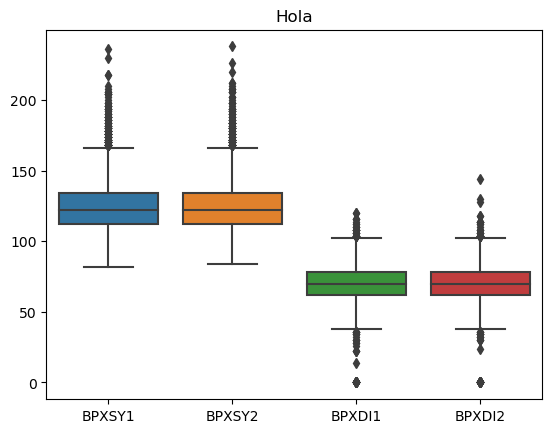

In [15]:
sub_datos = datos.loc[:,["BPXSY1","BPXSY2","BPXDI1","BPXDI2"]]

a = sns.boxplot(data=sub_datos)
a.set_title("Hola")

# Esta es una forma de gráficar nuestros datos

<AxesSubplot:>

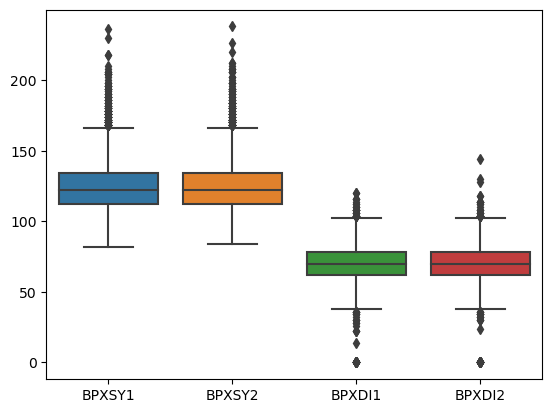

In [17]:
# también podemos hacerlo directamente sobre sns

sns.boxplot(data=datos.loc[:,["BPXSY1","BPXSY2","BPXDI1","BPXDI2"]])

In [22]:
# podemos hacer cortes por edad y por género

datos["Años_Corte"] = pd.cut(datos.RIAGENDR,[18,30,40,50,60,70,80])

#sns.boxplot(data=datos, y="P_ARTERIAL_SIST_1",x="Años_Corte", hue="SEXO")


# se hace un corte de años
# luego se comparan tipo de años los cortes
# finalmente se usa el parametro hue para diferenciar entre dos categorías

<AxesSubplot:xlabel='SEXO', ylabel='P_ARTERIAL_SIST_1'>

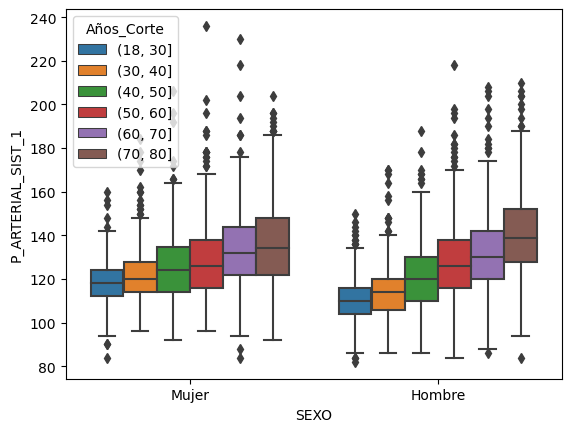

In [11]:
# esto mismo se puede hacer haciendo la división por los años

sns.boxplot(data=datos, y="P_ARTERIAL_SIST_1",x="SEXO", hue="Años_Corte")


In [12]:
# recordemos que groupby nos envia una seríe 

datos.groupby(["Años_Corte"]).SEXO.value_counts()



Años_Corte  SEXO  
(18, 30]    Hombre    609
            Mujer     544
(30, 40]    Hombre    474
            Mujer     458
(40, 50]    Hombre    502
            Mujer     401
(50, 60]    Hombre    470
            Mujer     454
(60, 70]    Hombre    441
            Mujer     437
(70, 80]    Hombre    410
            Mujer     402
Name: SEXO, dtype: int64

In [13]:
datos.groupby(["Años_Corte"]).SEXO.size()

Años_Corte
(18, 30]    1153
(30, 40]     932
(40, 50]     903
(50, 60]     924
(60, 70]     878
(70, 80]     812
Name: SEXO, dtype: int64

In [14]:

ejemplo = datos.groupby(["Años_Corte","SEXO",])["EDUCACION"].value_counts(normalize=True)
ejemplo = ejemplo.loc[~ejemplo.isin(["Desconocido"]),:]

ejemplo.unstack()

EDUCACION          Bachiller  Desconocido  No Indica  Noveno Grado  \
Años_Corte SEXO                                                      
(18, 30]   Hombre   0.215190          NaN   0.282098      0.048825   
           Mujer    0.250000          NaN   0.258475      0.042373   
(30, 40]   Hombre   0.164557          NaN   0.314346      0.097046   
           Mujer    0.227074          NaN   0.251092      0.102620   
(40, 50]   Hombre   0.173307          NaN   0.298805      0.105578   
           Mujer    0.209476          NaN   0.274314      0.112219   
(50, 60]   Hombre   0.234043          NaN   0.244681      0.102128   
           Mujer    0.242291          NaN   0.231278      0.123348   
(60, 70]   Hombre   0.206349          NaN   0.195011      0.188209   
           Mujer    0.231121          NaN   0.233410      0.151030   
(70, 80]   Hombre   0.239024     0.002439   0.148780      0.224390   
           Mujer    0.213930     0.004975   0.236318      0.179104   

EDUCACION          Noveno a Undecimo Grado  Universidad  
Años_Corte SEXO                                          
(18, 30]   Hombre                 0.079566     0.374322  
           Mujer                  0.116525     0.332627  
(30, 40]   Hombre                 0.088608     0.335443  
           Mujer                  0.150655     0.268559  
(40, 50]   Hombre                 0.109562     0.312749  
           Mujer                  0.142145     0.261845  
(50, 60]   Hombre                 0.117021     0.302128  
           Mujer                  0.147577     0.255507  
(60, 70]   Hombre                 0.117914     0.292517  
           Mujer                  0.135011     0.249428  
(70, 80]   Hombre                 0.104878     0.280488  
           Mujer                  0.111940     0.253731

In [132]:
a = datos.index
type(a)

pandas.core.indexes.range.RangeIndex

In [133]:
datos_2 = datos
datos_2.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,EDAD,RIDRETH1,DMDCITZN,NIVEL_EDUCATIVO,...,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210,EDUCACION,SEXO,Años_Corte
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,184.5,27.8,43.3,43.6,35.9,101.1,2.0,No Indica,Mujer,"(60, 70]"
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,171.4,30.8,38.0,40.0,33.2,107.9,NaN,Bachiller,Mujer,"(50, 60]"
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,170.1,28.8,35.6,37.0,31.0,116.5,2.0,Bachiller,Mujer,"(70, 80]"
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,160.9,42.4,38.5,37.7,38.3,110.1,2.0,No Indica,Hombre,"(50, 60]"
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,164.9,20.3,37.4,36.0,27.2,80.4,2.0,Universidad,Hombre,"(40, 50]"


In [19]:
ejemplo_2 = datos.loc[datos.EDUCACION.isin(["Desconocido","No Indica"]),:]
#ejemplo_2 = datos.groupby(["Años_Corte","SEXO",])["EDUCACION"].value_counts(normalize=True)
ejemplo_2.EDUCACION

0       No Indica
3       No Indica
10      No Indica
13      No Indica
14      No Indica
          ...    
5724    No Indica
5725    No Indica
5729    No Indica
5731    No Indica
5734    No Indica
Name: EDUCACION, Length: 1369, dtype: object

In [23]:
dx = datos.loc[~datos.DMDEDUC2.isin(["Don't know", "Missing"]), :]  # Eliminate rare/missing values
dx = dx.groupby(["Años_Corte", "RIAGENDR"])["DMDEDUC2"]
dx = dx.value_counts()
dx = dx.unstack() # Restructure the results from 'long' to 'wide'
dx = dx.apply(lambda x: x/x.sum(), axis=1) # Normalize within each stratum to get proportions
print(dx.to_string(float_format="%.3f"))  # Limit display to 3 decimal places

Empty DataFrame
Columns: []
Index: []
